In [35]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
import numpy as np
from matplotlib import pyplot

In [37]:
data = np.loadtxt('/content/drive/MyDrive/SIS 420 Inteligencia Artificial/Datasets/Video_Games_preparado.txt', delimiter=",",skiprows=1)
X = data[:, :1]
y = data[:, 1]
m = y.size

In [38]:
X = np.concatenate([X, X * X], axis=1)

In [39]:
# Normalización de características
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

In [40]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [41]:
def computeCostMultiRegularization(X, y, theta, lambda_):
    m = y.shape[0]
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

In [42]:
def gradientDescentMultiRegularization(X, y, theta, alpha, lambda_, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta -= (alpha / m) * (np.dot(X, theta) - y).dot(X)
        theta[1:] -= (alpha / m) * lambda_ * theta[1:]
        J_history.append(computeCostMultiRegularization(X, y, theta, lambda_))
    return theta, J_history

In [43]:
alpha = 0.01
num_iters = 10000
lambda_ = 0.1

In [44]:
theta = np.zeros(3)

In [45]:
theta_reg, J_history_reg = gradientDescentMultiRegularization(X, y, theta, alpha, lambda_, num_iters)

In [46]:
print('Theta calculado por el descenso por el gradiente con regularización: {:s}'.format(str(theta_reg)))

Theta calculado por el descenso por el gradiente con regularización: [2006.3956813    -3.68178334    3.14863296]


Text(0, 0.5, 'Costo J con regularización')

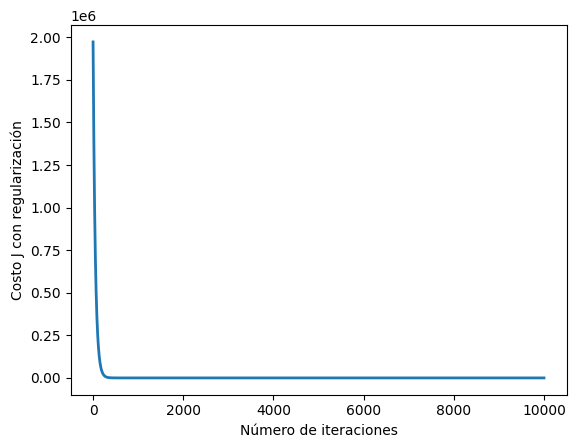

In [47]:
pyplot.plot(np.arange(len(J_history_reg)), J_history_reg, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J con regularización')

In [48]:
def predict(X, mu, sigma, theta):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    X[:, 1:3] = (X[:, 1:3] - mu) / sigma
    return np.dot(X, theta)

In [49]:
X_new = np.array([[1, 23, 529]])
prediction = predict(X_new[:, 1:], mu, sigma, theta_reg)
print('Predicción para ventas globales de 23 y puntuación de usuario de 529:', prediction[0])

Predicción para ventas globales de 23 y puntuación de usuario de 529: 2007.195091828325


In [50]:
def normalEqnRegularization(X, y, lambda_):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_ * np.identity(X.shape[1])), X.T), y)
    return theta

Theta calculado a partir de la ecuación de la normal con regularización: [2006.38367996   -3.77526496    3.24211459]


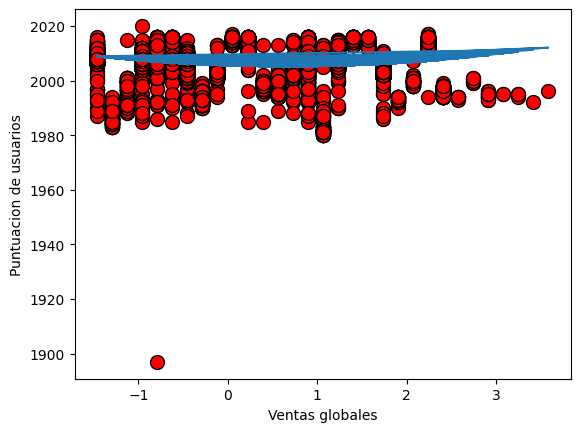

In [51]:
theta_normal_reg = normalEqnRegularization(X, y, lambda_)
print('Theta calculado a partir de la ecuación de la normal con regularización: {:s}'.format(str(theta_normal_reg)))

# Gráfico de los datos y la línea de regresión lineal
pyplot.figure()
pyplot.plot(X[:, 1], y, 'ro', ms=10, mec='k')
pyplot.ylabel('Puntuacion de usuarios')
pyplot.xlabel('Ventas globales')
pyplot.plot(X[:, 1], np.dot(X, theta_reg), '-')

El objetivo de este trabajo fue comparar la regresión lineal con y sin regularización utilizando el descenso de gradiente y la ecuación normal. Se utilizó un conjunto de datos que contiene información sobre ventas globales y puntuaciones de usuarios en videojuegos.

Primero, se implementó la regresión lineal con regularización utilizando el descenso de gradiente. Se agregaron términos polinomiales y se normalizaron las características. Luego, se calculó la función de costo con regularización y se aplicó el descenso de gradiente para encontrar los parámetros óptimos theta. Se observó que la introducción de la regularización ayudó a prevenir el sobreajuste del modelo.

Los mejores hiperparámetros encontrados fueron:

Tasa de aprendizaje (alpha): 0.01
Número de iteraciones: 10000
Parámetro de regularización (lambda): 0.1